# Cây quyết định với ID3:

- Cây quyết định với thuật toán ID3 là một phương pháp máy học dùng để xây dựng một cây quyết định từ một tập dữ liệu. Thuật toán ID3 (Iterative Dichotomiser 3) được phát triển bởi Ross Quinlan vào năm 1986 và thường được sử dụng cho bài toán phân loại.

- Cách hoạt động của ID3:
1. Chọn thuộc tính tốt nhất (best attribute):
    + ID3 sẽ chọn thuộc tính tốt nhất để chia dữ liệu tại mỗi nút (node) của cây. Để làm điều này, ID3 sử dụng độ đo Entropy và Information Gain.

2. Entropy (Độ hỗn loạn):
    + Entropy được sử dụng để đo lường độ không chắc chắn trong tập dữ liệu. Nếu một tập dữ liệu hoàn toàn đồng nhất (tất cả các mẫu thuộc cùng một lớp), entropy sẽ bằng 0. Nếu tập dữ liệu được chia đều giữa các lớp, entropy sẽ đạt giá trị lớn nhất.

3. Information Gain (Lợi ích thông tin):
    + Lợi ích thông tin đo lường sự giảm entropy khi một thuộc tính chia tập dữ liệu. ID3 chọn thuộc tính có information gain cao nhất để chia.

4. Xây dựng cây:
    + ID3 lặp lại quá trình chọn thuộc tính tốt nhất và chia dữ liệu cho đến khi:
        + Tất cả các mẫu thuộc cùng một lớp ở một nút.
        + Không còn thuộc tính nào để chọn.
        + Đã đạt tới một số tiêu chí dừng nhất định.
5. Quá trình pruning (tái cấu trúc cây):
    + Sau khi cây quyết định được xây dựng, quá trình pruning có thể được áp dụng để loại bỏ các nhánh không cần thiết, giúp cây trở nên đơn giản hơn và tránh overfitting.

- Ưu điểm của ID3:
    + Dễ hiểu và thực hiện.
    + Xử lý cả dữ liệu số và dữ liệu không gian.

- Nhược điểm của ID3:
    + Có thể tạo ra cây quyết định lớn và phức tạp.
    + Nhạy cảm với nhiễu và outliers.
    + Không xử lý được các giá trị thiếu (missing values) một cách tự động.

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

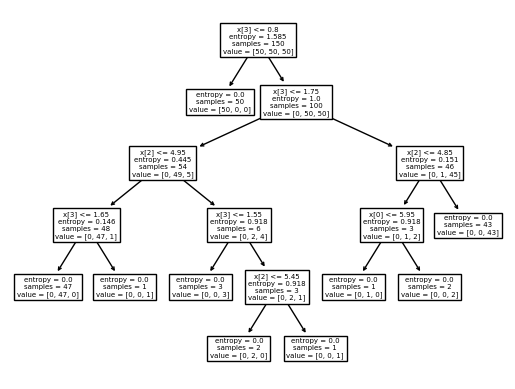

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create Decision Tree with ID3
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X, y)

# Plot the decision tree (optional)
tree.plot_tree(clf)

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd

class TreeNode(object):
    def __init__(self, ids=None, children=[], entropy=0, depth=0):
        self.ids = ids  # index of data in this node
        self.entropy = entropy  # entropy, will fill later
        self.depth = depth  # distance to root node
        self.split_attribute = None  # which attribute is chosen, it non-leaf
        self.children = children  # list of its child nodes
        self.order = None  # order of values of split_attribute in children
        self.label = None  # label of node if it is a leaf

    def set_properties(self, split_attribute, order):
        self.split_attribute = split_attribute  # split at which attribute
        self.order = order  # order of this node's children

    def set_label(self, label):
        self.label = label  # set label if the node is a leaf

In [2]:
def entropy(freq):
    # remove prob 0
    freq_0 = freq[np.array(freq).nonzero()[0]]
    prob_0 = freq_0/float(freq_0.sum())
    return -np.sum(prob_0*np.log(prob_0))

In [13]:
class DecisionTreeID3(object):
    def __init__(self, max_depth=10, min_samples_split=2, min_gain=1e-4):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.Ntrain = 0
        self.min_gain = min_gain

    def fit(self, data, target):
        self.Ntrain = data.shape[0]
        self.data = data
        self.attributes = list(data.columns)
        self.target = target
        self.labels = target.unique()

        ids = list(range(self.Ntrain))
        self.root = TreeNode(ids=ids, entropy=self._entropy(ids), depth=0)
        queue = [self.root]
        while queue:
            node = queue.pop()
            if node.depth < self.max_depth or node.entropy < self.min_gain:
                node.children = self._split(node)
                if not node.children:  # leaf node
                    self._set_label(node)
                queue += node.children
            else:
                self._set_label(node)

    def _entropy(self, ids):
        # calculate entropy of a node with index ids
        if len(ids) == 0:
            return 0
        freq = np.array(self.target.iloc[ids].value_counts())
        return entropy(freq)

    def _set_label(self, node):
        # find label for a node if it is a leaf
        # simply chose by major voting
        target_ids = node.ids
        node.set_label(self.target.iloc[target_ids].mode()[0])  # most frequent label

    def _split(self, node):
        ids = node.ids
        best_gain = 0
        best_splits = []
        best_attribute = None
        order = None
        sub_data = self.data.iloc[ids, :]
        for i, att in enumerate(self.attributes):
            values = self.data.iloc[ids, i].unique().tolist()
            if len(values) == 1:
                continue  # entropy = 0
            splits = []
            for val in values:
                sub_ids = sub_data.index[sub_data[att] == val].tolist()
                splits.append(sub_ids)
            # don't split if a node has too small number of points
            if min(map(len, splits)) < self.min_samples_split:
                continue
            # information gain
            HxS = 0
            for split in splits:
                HxS += len(split) * self._entropy(split) / len(ids)
            gain = node.entropy - HxS
            if gain < self.min_gain:
                continue  # stop if small gain
            if gain > best_gain:
                best_gain = gain
                best_splits = splits
                best_attribute = att
                order = values
        node.set_properties(best_attribute, order)
        child_nodes = [TreeNode(ids=split,
                               entropy=self._entropy(split), depth=node.depth + 1) for split in best_splits]
        return child_nodes

    def predict(self, new_data):
        """
        :param new_data: a new dataframe, each row is a datapoint
        :return: predicted labels for each row
        """
        npoints = new_data.shape[0]
        labels = [None] * npoints
        for n in range(npoints):
            x = new_data.iloc[n, :]  # one point
            # start from root and recursively travel if not meet a leaf
            node = self.root
            while node.children:
                try:
                    node = node.children[node.order.index(x[node.split_attribute])]
                except ValueError:
                    # If the value is not in training data, choose the most common label
                    labels[n] = self.target.mode()[0]
                    break
            else:
                labels[n] = node.label

        return labels

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Split the data into features and target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Decision Tree
tree = DecisionTreeID3(max_depth=10, min_samples_split=2, min_gain=1e-4)
tree.fit(X_train, y_train)

# Predict on the test set
predictions = tree.predict(X_test)

# Compare predictions to actual labels
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)


Accuracy: 0.28888888888888886


# Mô hình phân lớp Bayes

- Mô hình phân lớp Bayes là một mô hình thống kê dựa trên nguyên lý Bayes để dự đoán xác suất của một điểm dữ liệu thuộc về một lớp cụ thể. Thuật toán này được đặt tên theo nhà toán học Thomas Bayes.

- Nguyên lý Bayes
+ Nguyên lý Bayes là một công cụ quan trọng trong xác suất thống kê, cho phép chúng ta cập nhật kiến thức của mình khi có thêm bằng chứng mới. Công thức cơ bản của nguyên lý Bayes là:

    $ P(A|B) = P(B/A)P(A) / P(B) $ <br>

+ Trong đó:
    + P(A∣B) là xác suất của sự kiện A xảy ra khi biết rằng sự kiện B đã xảy ra.
    + P(B∣A) là xác suất của sự kiện B xảy ra khi biết rằng sự kiện A đã xảy ra.
    + P(A) và  P(B) là xác suất xảy ra của sự kiện A và B tương ứng.

- Mô hình phân lớp Bayes
+ Mô hình phân lớp Bayes có thời gian training và test rất nhanh. Điều này có được là do giả sử về tính độc lập giữa các thành phần, nếu biết class.
+ Nếu giả sử về tính độc lập được thoả mãn (dựa vào bản chất của dữ liệu), Mô hình phân lớp Bayes được cho là cho kết quả tốt hơn so với SVM và logistic regression khi có ít dữ liệu training.
+ NMô hình phân lớp Bayes có thể hoạt động với các feature vector mà một phần là liên tục (sử dụng Gaussian Naive Bayes), phần còn lại ở dạng rời rạc (sử dụng Multinomial hoặc Bernoulli).
+ Khi sử dụng Mô hình phân lớp Bayes, Laplace smoothing thường được sử dụng để tránh trường hợp 1 thành phần trong test data chưa xuất hiện ở training data.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gaussian Naive Bayes classifier
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


# Mô hình phân lớp SVM

- Mô hình phân lớp SVM (Support Vector Machine) là một trong những phương pháp học máy phổ biến trong lớp các mô hình học có giám sát, được sử dụng cho các tác vụ phân loại và hồi quy. SVM được sử dụng nhiều trong các bài toán phân loại vì khả năng xử lý tốt đối với các bộ dữ liệu có số chiều cao và hiệu quả với các bộ dữ liệu kích thước lớn

- Mục tiêu của SVM là tối đa hoá ranh giới (margin) giữa các lớp, điều này cũng đồng nghĩa với việc tối thiểu hóa sai số phân loại. SVM có thể được sử dụng cho cả hai loại bài toán là phân loại nhị phân và phân loại đa lớp (multiclass classification)

- Khi có dữ liệu huấn luyện, SVM sẽ tìm ra ranh giới phân chia bằng cách giải bài toán tối ưu hóa trong không gian đặc trưng. Một số hàm kernel thông dụng được sử dụng trong SVM để chuyển đổi dữ liệu từ không gian ban đầu sang không gian cao chiều hơn, giúp SVM phát hiện các ranh giới phân chia phi tuyến tính.

- Điểm mạnh của SVM bao gồm khả năng làm việc tốt với các bộ dữ liệu lớn, khả năng áp dụng cho các không gian đặc trưng lớn, và độ chính xác cao. Tuy nhiên, SVM cũng có điểm yếu là yêu cầu tốn nhiều bộ nhớ và thời gian tính toán khi xử lý các bộ dữ liệu lớn

In [9]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load Iris dataset (just for demonstration)
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier
clf = SVC(kernel='linear')  # Linear kernel for simplicity
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Check accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


# Mô hình phân lớp với giải thuật giảm gradient

- Mô hình phân loại với giải thuật gradient descent là một phương pháp trong machine learning để huấn luyện mô hình dự đoán dựa trên dữ liệu đã biết. Mục tiêu của giải thuật này là tối ưu hóa các tham số của mô hình bằng cách điều chỉnh chúng một cách liên tục để giảm thiểu độ lỗi.

- Quá trình này bắt đầu bằng việc tính toán độ dốc của hàm mất mát (loss function) tại các điểm dữ liệu. Sau đó, các tham số của mô hình được cập nhật theo hướng ngược với độ dốc này để giảm thiểu độ lỗi. Quá trình này lặp lại cho đến khi đạt được điều kiện dừng, thường là khi độ lỗi không đổi hoặc không đổi đủ nhỏ.

- Điểm mạnh của giải thuật gradient descent là có thể áp dụng cho các mô hình phức tạp và dữ liệu lớn. Tuy nhiên, cần chú ý đến việc chọn hệ số học (learning rate) sao cho đủ lớn để hội tụ nhanh nhưng không quá lớn để tránh "quá lướt" qua điểm tối ưu.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Fit the classifier
gb_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = gb_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7333333333333333


In [5]:
# Create a meshgrid to plot decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

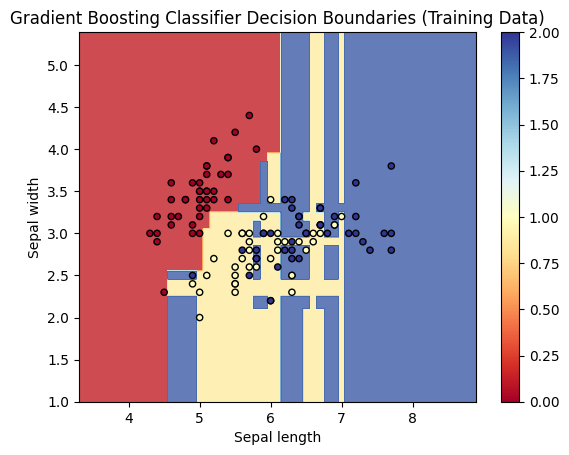

In [8]:
# Plot decision boundaries
Z = gb_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Gradient Boosting Classifier Decision Boundaries (Training Data)')
plt.colorbar()
plt.show()